In [1]:
#!pip install TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np

In [4]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    #APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info

APInames, metaKG, Translator_KP_info= load_translator_resources()

In [6]:
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



In [7]:
url = 'https://amlkg.systemsbiology.org:9990/AMLkg/meta_knowledge_graph'
response = requests.get(url)
data = response.json()
for i in range(len(data["edges"])):
    APInames, metaKG = translator_metakg.add_new_API_for_query(APInames, metaKG, "AMLKG", "https://amlkg.systemsbiology.org:9990/AMLkg/query", data["edges"][i]['predicate'], data["edges"][i]['subject'], data["edges"][i]['object'])


In [10]:
API_withMetaKG = list(set(metaKG['API']))
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



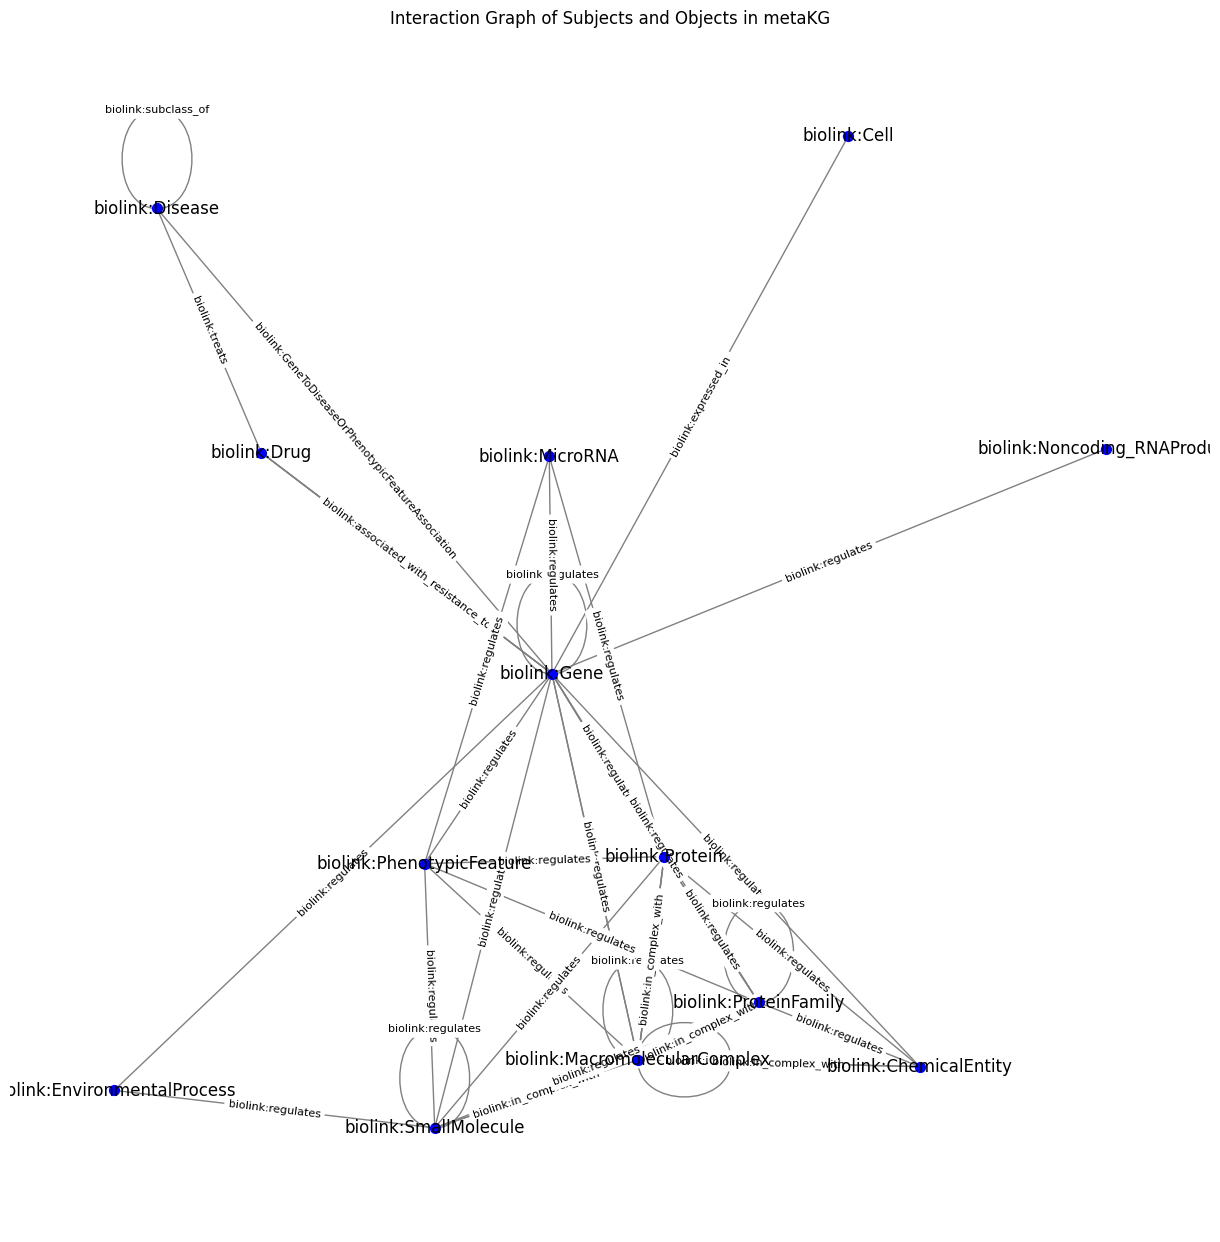

In [11]:
import networkx as nx
selected_KGs = ['AMLKG']

metaKG_sele = metaKG[metaKG['API'].isin(selected_KGs)]

# build a multigraph to capture all edges (including duplicates) and their predicates
G = nx.MultiGraph()
for _, row in metaKG_sele.iterrows():
        G.add_edge(row['Subject'], row['Object'], predicate=row['Predicate'])

# layout and draw nodes + edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos,
                with_labels=True,
                node_size=50,
                font_size=12,
                font_color='black',
                node_color='blue',
                edge_color='gray')

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()

In [12]:
metaKG_sele

API                                          Predicate  \
10576  AMLKG                               biolink:expressed_in   
10577  AMLKG                                  biolink:regulates   
10578  AMLKG                                  biolink:regulates   
10579  AMLKG                                  biolink:regulates   
10580  AMLKG                                  biolink:regulates   
10581  AMLKG                                  biolink:regulates   
10582  AMLKG                                  biolink:regulates   
10583  AMLKG                                  biolink:regulates   
10584  AMLKG                                  biolink:regulates   
10585  AMLKG                                  biolink:regulates   
10586  AMLKG                                  biolink:regulates   
10587  AMLKG                                  biolink:regulates   
10588  AMLKG                                  biolink:regulates   
10589  AMLKG                                  biolink:regulates   
10590  AMLKG                                  biolink:regulates   
10591  AMLKG                                  biolink:regulates   
10592  AMLKG                                  biolink:regulates   
10593  AMLKG                                  biolink:regulates   
10594  AMLKG                                  biolink:regulates   
10595  AMLKG                                  biolink:regulates   
10596  AMLKG                                  biolink:regulates   
10597  AMLKG                            biolink:in_complex_with   
10598  AMLKG                            biolink:in_complex_with   
10599  AMLKG                                  biolink:regulates   
10600  AMLKG                            biolink:in_complex_with   
10601  AMLKG                                  biolink:regulates   
10602  AMLKG                                  biolink:regulates   
10603  AMLKG                            biolink:in_complex_with   
10604  AMLKG                                  biolink:regulates   
10605  AMLKG                                  biolink:regulates   
10606  AMLKG                                  biolink:regulates   
10607  AMLKG                                  biolink:regulates   
10608  AMLKG                            biolink:in_complex_with   
10609  AMLKG                                  biolink:regulates   
10610  AMLKG                                  biolink:regulates   
10611  AMLKG                                  biolink:regulates   
10612  AMLKG                                  biolink:regulates   
10613  AMLKG                                  biolink:regulates   
10614  AMLKG                                  biolink:regulates   
10615  AMLKG                                  biolink:regulates   
10616  AMLKG                                  biolink:regulates   
10617  AMLKG             biolink:associated_with_sensitivity_to   
10618  AMLKG              biolink:associated_with_resistance_to   
10619  AMLKG  biolink:GeneToDiseaseOrPhenotypicFeatureAssoci...   
10620  AMLKG                                     biolink:treats   
10621  AMLKG                                biolink:subclass_of   

                             Subject                         Object  \
10576                   biolink:Gene                   biolink:Cell   
10577                   biolink:Gene                   biolink:Gene   
10578  biolink:MacromolecularComplex                   biolink:Gene   
10579  biolink:MacromolecularComplex      biolink:PhenotypicFeature   
10580         biolink:ChemicalEntity                   biolink:Gene   
10581                biolink:Protein                   biolink:Gene   
10582                   biolink:Gene  biolink:MacromolecularComplex   
10583          biolink:SmallMolecule                   biolink:Gene   
10584          biolink:SmallMolecule          biolink:SmallMolecule   
10585          biolink:SmallMolecule          biolink:ProteinFamily   
10586          biolink:ProteinFamily                   biolink:Gene   
10587  

In [13]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = [
    'AMLKG',
    'Clinical Trials KP - TRAPI 1.5.0', 
    'Drug Approvals KP - TRAPI 1.5.0',
]

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
print(select_APIs)
print(selected_metaKG.shape)

{'AMLKG': 'https://amlkg.systemsbiology.org:9990/AMLkg/query', 'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.transltr.io/ctkp/query/', 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.transltr.io/dakp/query/'}
(46, 5)


In [14]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('AML',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = select_APIs,
                                                                                            metaKG = selected_metaKG,
                                                                                            API_predicates = API_predicates)     

MONDO:0018874
AMLKG: Success!


[Text(0.5, 0, 'Pemigatinib'), Text(2.5, 0, 'Marqibo'), Text(4.5, 0, 'diarsenic trioxide'), Text(6.5, 0, 'DAUNOrubicin Hydrochloride Novaplus'), Text(8.5, 0, 'Quizartinib'), Text(10.5, 0, 'Gilteritinib'), Text(12.5, 0, 'Mitoxantrone'), Text(14.5, 0, 'Prednisone'), Text(16.5, 0, 'Venetoclax'), Text(18.5, 0, 'Daunorubicin'), Text(20.5, 0, 'Decitabine'), Text(22.5, 0, 'cytarabine / daunorubicin'), Text(24.5, 0, 'N-(Hydroxyethyl)doxorubicin hydrochloride'), Text(26.5, 0, 'Enasidenib'), Text(28.5, 0, 'Rituximab 10 MG/1 ML Intravenous Solution [RITUXAN]'), Text(30.5, 0, 'Ivosidenib'), Text(32.5, 0, 'Cyclophosphamide')]


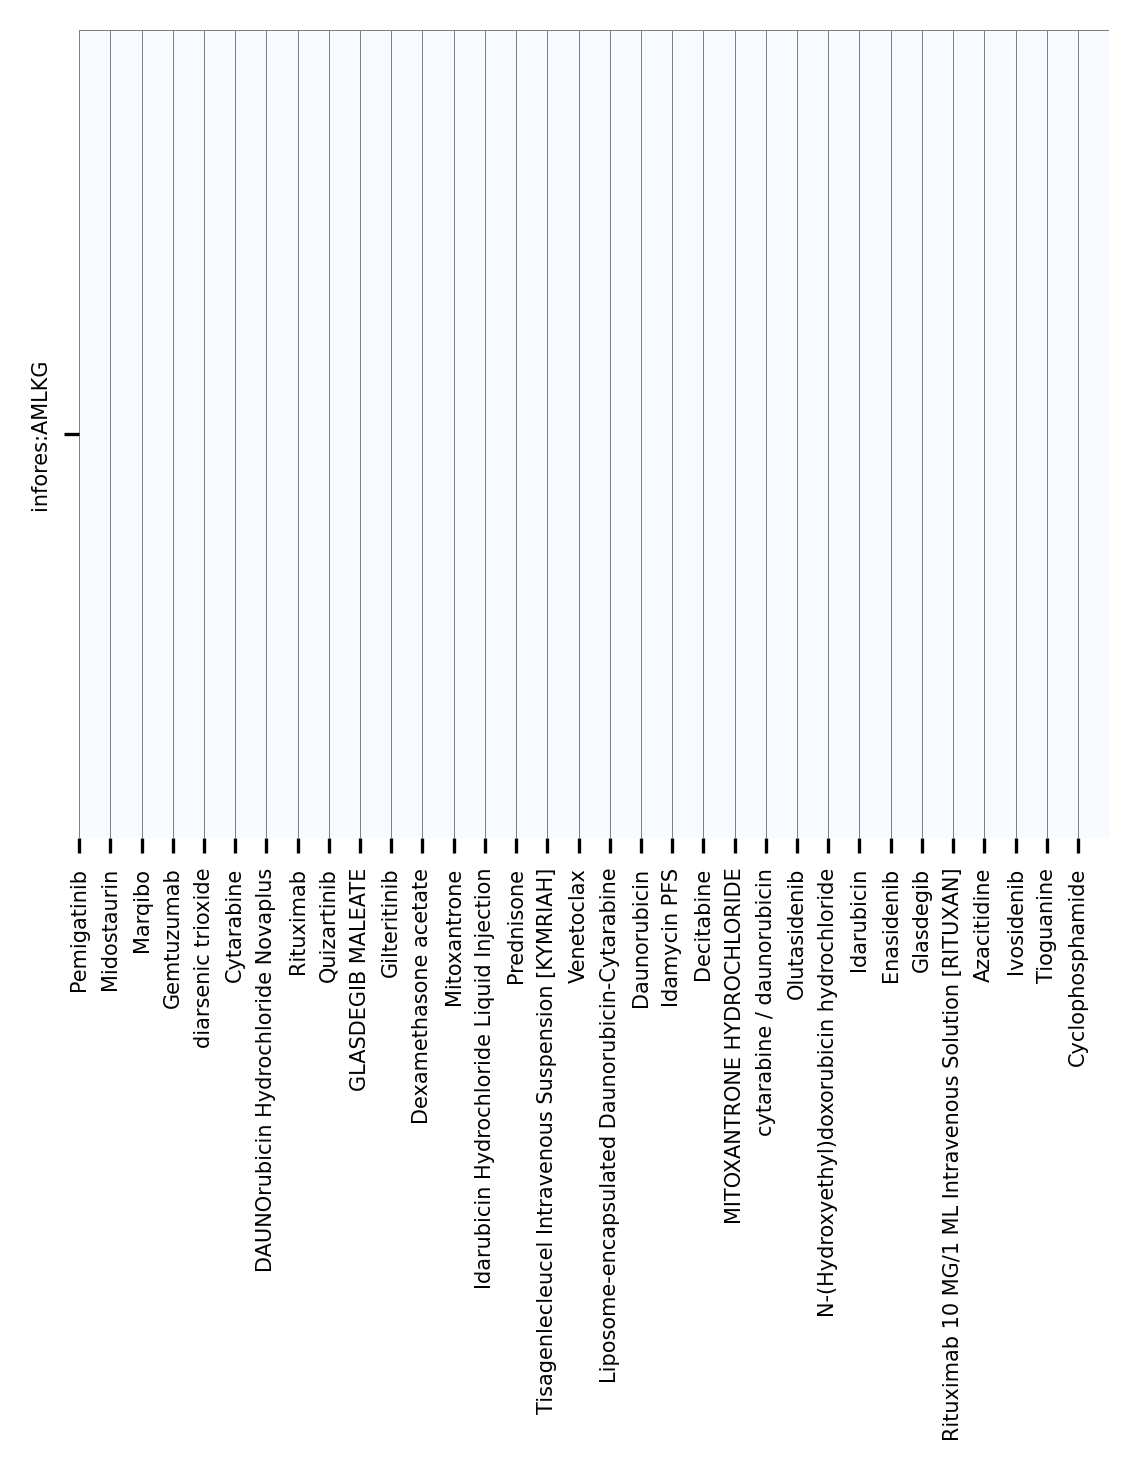

[Text(0.5, 0, 'Pemigatinib'), Text(2.5, 0, 'Marqibo'), Text(4.5, 0, 'diarsenic trioxide'), Text(6.5, 0, 'DAUNOrubicin Hydrochloride Novaplus'), Text(8.5, 0, 'Quizartinib'), Text(10.5, 0, 'Gilteritinib'), Text(12.5, 0, 'Mitoxantrone'), Text(14.5, 0, 'Prednisone'), Text(16.5, 0, 'Venetoclax'), Text(18.5, 0, 'Daunorubicin'), Text(20.5, 0, 'Decitabine'), Text(22.5, 0, 'cytarabine / daunorubicin'), Text(24.5, 0, 'N-(Hydroxyethyl)doxorubicin hydrochloride'), Text(26.5, 0, 'Enasidenib'), Text(28.5, 0, 'Rituximab 10 MG/1 ML Intravenous Solution [RITUXAN]'), Text(30.5, 0, 'Ivosidenib'), Text(32.5, 0, 'Cyclophosphamide')]


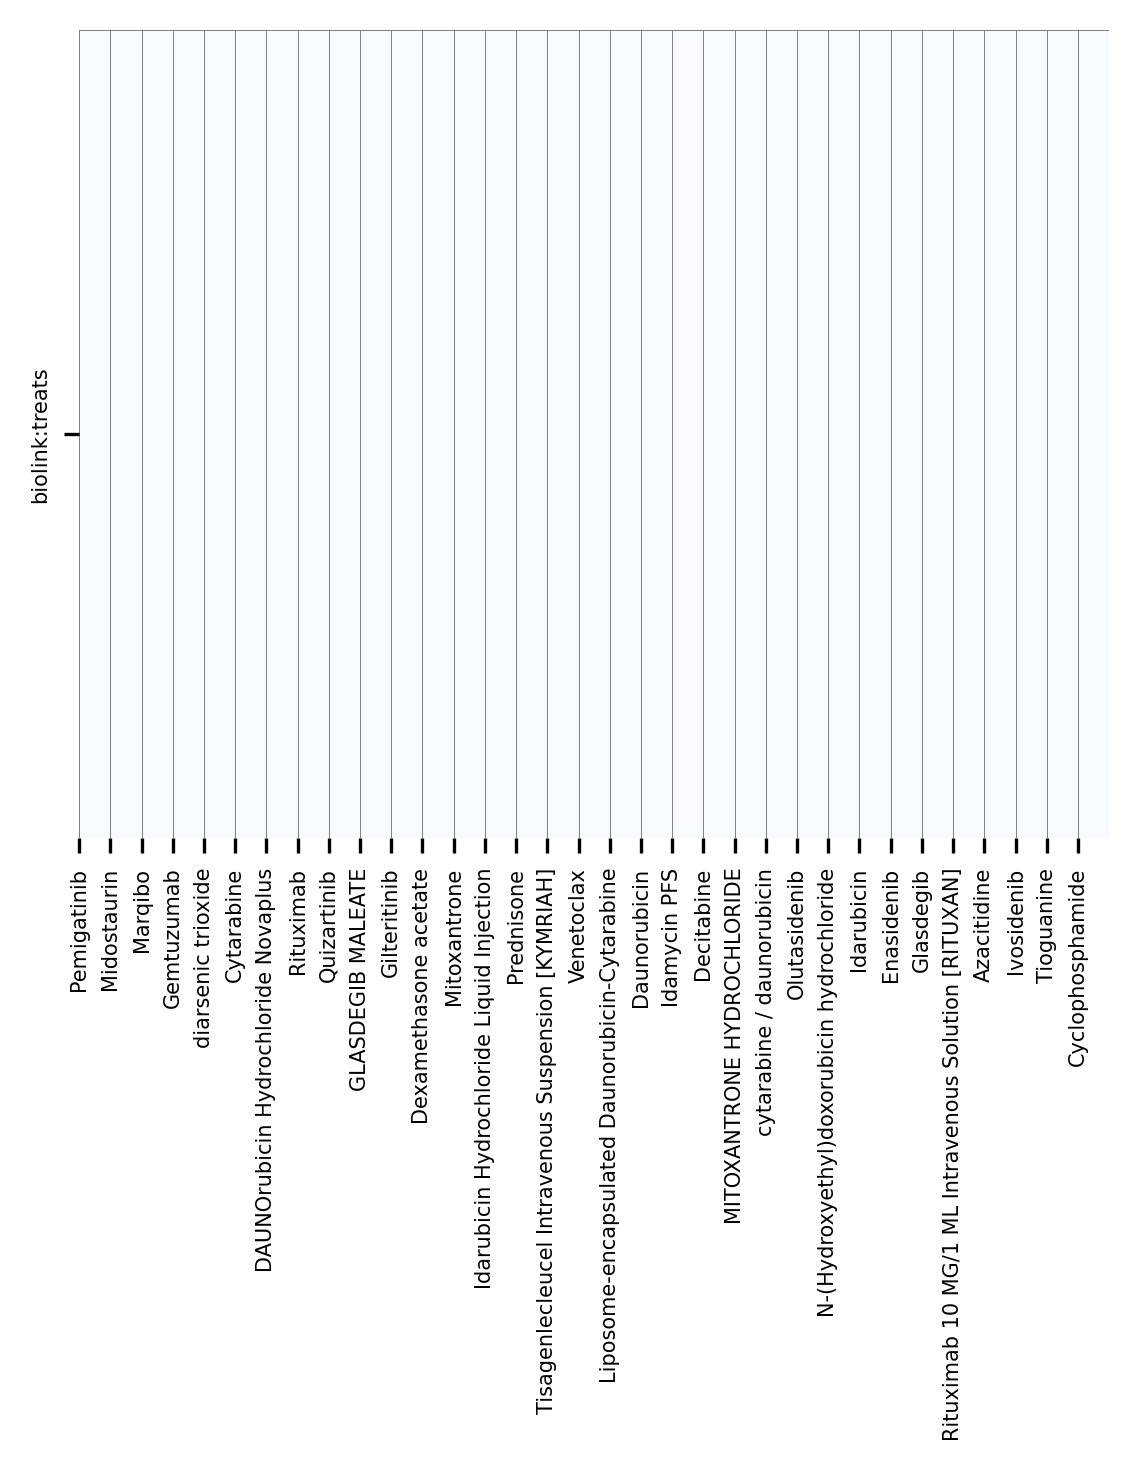

Pemigatinib  Midostaurin  Marqibo  Gemtuzumab  \
biolink:treats            1            1        1           1   

                diarsenic trioxide  Cytarabine  \
biolink:treats                   1           1   

                DAUNOrubicin Hydrochloride Novaplus  Rituximab  Quizartinib  \
biolink:treats                                    1          1            1   

                GLASDEGIB MALEATE  ...  Olutasidenib  \
biolink:treats                  1  ...             1   

                N-(Hydroxyethyl)doxorubicin hydrochloride  Idarubicin  \
biolink:treats                                          1           1   

                Enasidenib  Glasdegib  \
biolink:treats           1          1   

                Rituximab 10 MG/1 ML Intravenous Solution [RITUXAN]  \
biolink:treats                                                  1     

                Azacitidine  Ivosidenib  Tioguanine  Cyclophosphamide  
biolink:treats            1           1           1                 1  

[1 rows x 33 columns]

In [15]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

MONDO:0018874
NCBIGene:7157
AMLKG: Success!
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hmdb(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'Non

/Users/guangrong/.pyenv/versions/3.12.1/lib/python3.12/site-packages/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


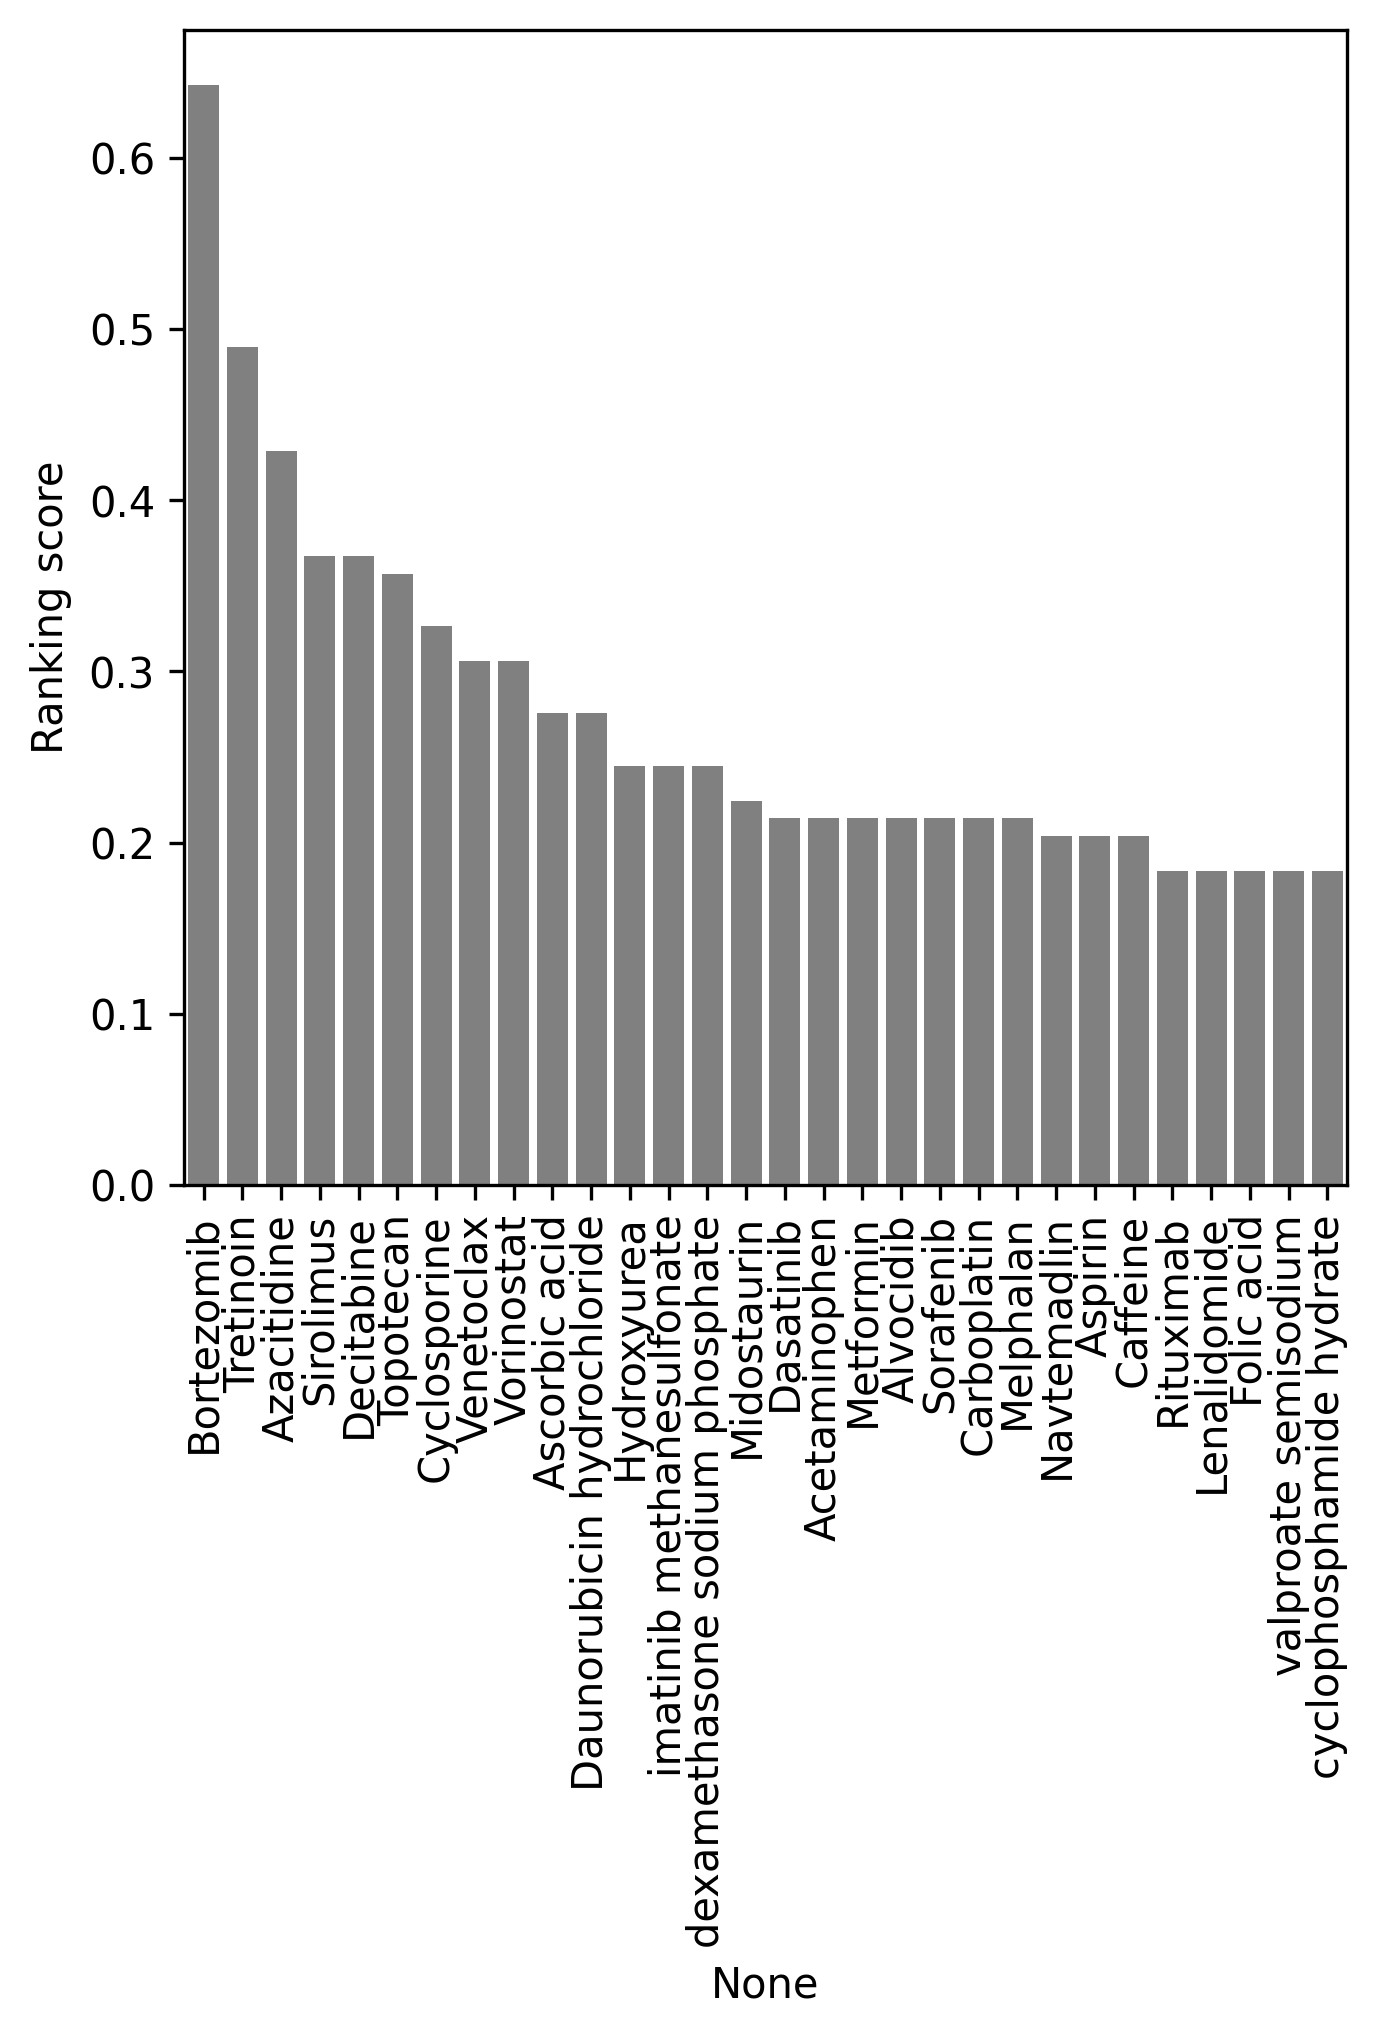

In [16]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('AML', 
                                                                                                                                                                                'TP53', 
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'], 
                                                                                                                                                                                APInames=APInames, 
                                                                                                                                                                                metaKG=metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [17]:
paths.head(20)

score   output_node  \
Bortezomib                      0.642857   CHEBI:52717   
Tretinoin                       0.489796   CHEBI:15367   
Azacitidine                     0.428571    CHEBI:2038   
Sirolimus                       0.367347    CHEBI:9168   
Decitabine                      0.367347   CHEBI:50131   
Topotecan                       0.357143   CHEBI:63632   
Cyclosporine                    0.326531    CHEBI:4031   
Venetoclax                      0.306122  CHEBI:133021   
Vorinostat                      0.306122   CHEBI:45716   
Ascorbic acid                   0.275510   CHEBI:22652   
Daunorubicin hydrochloride      0.275510   CHEBI:31456   
Hydroxyurea                     0.244898   CHEBI:44423   
imatinib methanesulfonate       0.244898   CHEBI:31690   
dexamethasone sodium phosphate  0.244898    CHEBI:4462   
Midostaurin                     0.224490   CHEBI:63452   
Dasatinib                       0.214286   CHEBI:49375   
Acetaminophen                   0.214286   CHEBI:46195   
Metformin                       0.214286    CHEBI:6801   
Alvocidib                       0.214286   CHEBI:47344   
Sorafenib                       0.214286   CHEBI:50924   

                                                                       predictes1  \
Bortezomib                      biolink:treats_or_applied_or_studied_to_treat;...   
Tretinoin                       biolink:has_adverse_event; biolink:treats_or_a...   
Azacitidine                     biolink:treats_or_applied_or_studied_to_treat;...   
Sirolimus                       biolink:treats_or_applied_or_studied_to_treat;...   
Decitabine                      biolink:has_adverse_event; biolink:treats_or_a...   
Topotecan                       biolink:has_adverse_event; biolink:treats_or_a...   
Cyclosporine                    biolink:has_adverse_event; biolink:treats_or_a...   
Venetoclax                      biolink:has_adverse_event; biolink:treats_or_a...   
Vorinostat                      biolink:has_adverse_event; biolink:treats_or_a...   
Ascorbic acid                   biolink:has_adverse_event; biolink:treats_or_a...   
Daunorubicin hydrochloride      biolink:treats_or_applied_or_studied_to_treat;...   
Hydroxyurea                     biolink:treats_or_applied_or_studied_to_treat;...   
imatinib methanesulfonate       biolink:has_adverse_event; biolink:treats_or_a...   
dexamethasone sodium phosphate  biolink:has_adverse_event; biolink:treats_or_a...   
Midostaurin                     biolink:treats_or_applied_or_studied_to_treat;...   
Dasatinib                       biolink:treats_or_applied_or_studied_to_treat;...   
Acetaminophen                   biolink:has_adverse_event; biolink:treats_or_a...   
Metformin                       biolink:has_adverse_event; biolink:treats_or_a...   
Alvocidib                       biolink:treats_or_applied_or_studied_to_treat;...   
Sorafenib                       biolink:treats_or_applied_or_studied_to_treat;...   

                                                                       predictes2  \
Bortezomib                      biolink:affects; biolink:affects; biolink:affe...   
Tretinoin                       biolink:affects; biolink:affects; biolink:affe...   
Azacitidine                     biolink:affects; biolink:affects; biolink:inte...   
Sirolimus                       biolink:affects; biolink:regulates; biolink:se...   
Decitabine                      biolink:affects; biolink:affects; biolink:affe...   
Topotecan                       biolink:affects; biolink:affects; biolink:affe...   
Cyclosporine                    biolink:affects; biolink:regulates; biolink:af...   
Venetoclax                      biolink:affects; biolink:interacts_with; bioli...   
Vorinostat                      biolink:affects; biolink:affects; biolink:affe...   
Ascorbic acid                   biolink:affects; biolink:affects; biolink:affe...   
Daunorubicin hydrochloride      biolink:interacts_with; biolink:affects; bioli...   
Hydroxyure

In [20]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Azacitidine').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…